# Set up

In [1]:
import os
os.environ['ISISROOT'] = '/usgs/cpkgs/anaconda3_linux/envs/isis3.9.0'
from pysis import isis

import ctypes
from ctypes.util import find_library
ctypes.CDLL(find_library('usgscsm'))




from autocnet.io.db.model import Measures, Points, Images

import matplotlib.pyplot as plt
import pandas as pd

### Parse the Configuration Files
The configureation file holds information about how to set up a lot of the different services leverage in the AutoCNet code base.

In [2]:
config_path = f'/home/ladoramkershner/projects/config_autocnet/moon/kaguya/workshop/kaguya_reiner_gamma_morning_workshop.yml'
# config_path = f'/home/ladoramkershner/projects/config_autocnet/moon/kaguya/workshop/kaguya_reiner_gamma_morning_workshop_name.yml'

It is convenient to print out some of the information within the configuration file to ensure you have loaded the correct one. Some things of note to look out for are:
- Is the database name and log directory path the ones you expected?
- Does the ISISROOT match to one you gave in the first cell?
- Does the conda env match the one used in this notebook?

In [3]:
from autocnet.config_parser import parse_config

config = parse_config(config_path)
print('db name: ', config['database']['name'])
log_dir = config['cluster']['cluster_log_dir']
print('log dir: ', log_dir)
print('ISISROOT: ', config['env']['ISISROOT'])
print('conda env: ', config['env']['conda'])

db name:  workshop_kaguya_reiner_gamma
log dir:  /scratch/ladoramkershner/kaguya/workshop/logs
ISISROOT:  /usgs/cpkgs/anaconda3_linux/envs/isis4.2.0
conda env:  autocnet_local


# Read in 

### First Run - File List

In [5]:
# Center of Reinner Gamma (7.40, -58.80)
# Extents of the cubes 
# Latitude: (4.9, 9.9)
# Longitude: (-61.3, -56.3) -> (298.7, 303.7)

from autocnet.graph.network import NetworkCandidateGraph

filelist = f'/scratch/ladoramkershner/kaguya/workshop/cubes_updated.lis' # this should contain absolute paths

ncg = NetworkCandidateGraph()
ncg.config_from_file(config_path)
ncg.add_from_filelist(filelist, clear_db=True)

/work/users/ladoramkershner/projects/autocnet/autocnet/graph/network.py:2118: UserWarning: Failed to reset primary id sequence for table costs
  warnings.warn(f'Failed to reset primary id sequence for table {t}')


loading 1 of 69


/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1917: SAWarning: Setting backref / back_populates on relationship Points.overlay to refer to viewonly relationship Overlay.points will be deprecated in SQLAlchemy 1.4, and will be disallowed in a future release.  viewonly relationships should not be mutated (this warning may be suppressed after 10 occurrences)
  (self, other),
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1917: SAWarning: Setting backref / back_populates on relationship Overlay.points to refer to viewonly relationship Points.overlay will be deprecated in SQLAlchemy 1.4, and will be disallowed in a future release.  viewonly relationships should not be mutated (this warning may be suppressed after 10 occurrences)
  (self, other),


loading 2 of 69
loading 3 of 69
loading 4 of 69
loading 5 of 69
loading 6 of 69
loading 7 of 69
loading 8 of 69
loading 9 of 69
loading 10 of 69
loading 11 of 69
loading 12 of 69
loading 13 of 69
loading 14 of 69
loading 15 of 69
loading 16 of 69
loading 17 of 69
loading 18 of 69
loading 19 of 69
loading 20 of 69
loading 21 of 69
loading 22 of 69
loading 23 of 69
loading 24 of 69
loading 25 of 69
loading 26 of 69
loading 27 of 69
loading 28 of 69
loading 29 of 69
loading 30 of 69
loading 31 of 69
loading 32 of 69
loading 33 of 69
loading 34 of 69
loading 35 of 69
loading 36 of 69
loading 37 of 69
loading 38 of 69
loading 39 of 69
loading 40 of 69
loading 41 of 69
loading 42 of 69
loading 43 of 69
loading 44 of 69
loading 45 of 69
loading 46 of 69
loading 47 of 69
loading 48 of 69
loading 49 of 69
loading 50 of 69
loading 51 of 69
loading 52 of 69
loading 53 of 69
loading 54 of 69
loading 55 of 69
loading 56 of 69
loading 57 of 69
loading 58 of 69
loading 59 of 69
loading 60 of 69
loadi

### All Subsequent Runs

In [4]:
ncg = NetworkCandidateGraph()
ncg.config_from_file(config_path)
ncg.from_database()

/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1917: SAWarning: Setting backref / back_populates on relationship Points.overlay to refer to viewonly relationship Overlay.points will be deprecated in SQLAlchemy 1.4, and will be disallowed in a future release.  viewonly relationships should not be mutated (this warning may be suppressed after 10 occurrences)
  (self, other),
/home/ladoramkershner/miniconda3/envs/autocnet_local/lib/python3.7/site-packages/sqlalchemy/orm/relationships.py:1917: SAWarning: Setting backref / back_populates on relationship Overlay.points to refer to viewonly relationship Points.overlay will be deprecated in SQLAlchemy 1.4, and will be disallowed in a future release.  viewonly relationships should not be mutated (this warning may be suppressed after 10 occurrences)
  (self, other),


In [5]:
print('Cluster queue length:')
print('before -> ', ncg.queue_length)

Cluster queue length:
before ->  0


In [ ]:
print('Cleaning up cluster queue:')
ncg.queue_flushdb()
print('after  -> ', ncg.queue_length)

### Visualize Graph

<AxesSubplot:>

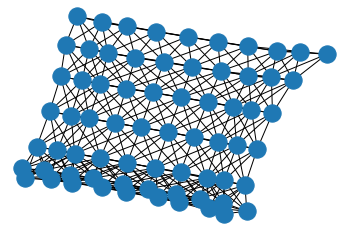

In [6]:
ncg.plot()

# Place Points in Overlap

### ppio: Create the Log Directory

In [7]:
# Make sure the output log directory exists
ppio_log_dir = log_dir.replace('logs', 'ppio_logs')
print(ppio_log_dir)

if not os.path.exists(ppio_log_dir):
    os.mkdir(ppio_log_dir)
    
print('Exists: ', os.path.exists(ppio_log_dir))

/scratch/ladoramkershner/kaguya/workshop/ppio_logs
Exists:  True


### ppio: Call Function

In [10]:
def ns(x):
    from math import ceil
    return ceil(round(x,1)*8)

def ew(x):
    from math import ceil
    return ceil(round(x,1)*1)

distribute_points_kwargs = {'nspts_func':ns, 'ewpts_func':ew, 'method':'classic'}

njobs = ncg.apply('spatial.overlap.place_points_in_overlap', 
                  on='overlaps', 
                  walltime='00:20:00',
                  cam_type='isis',
                  distribute_points_kwargs=distribute_points_kwargs,
                  log_dir=ppio_log_dir,
                  arraychunk=100,
                  chunksize=714) # maximum chunksize = 20,000
print(njobs)


714


### ppio: Check queue -> reapply if needed
Sometimes jobs fail to submit to the cluster

In [12]:
redis_orphans = ncg.queue_length
print("jobs left on the queue: ", redis_orphans)

jobs left on the queue:  0


In [ ]:
# job_array = ncg.apply('spatial.overlap.place_points_in_overlap', 
#                         chunksize=redis_orphans,
#                         arraychunk=None,
#                         walltime='00:30:00',
#                         log_dir=ppio_log_dir,
#                         reapply=True)
# print(job_array)

**plot overlaps and point distribution**

### ppio: Write out Network

In [13]:
path = '/scratch/ladoramkershner/kaguya/workshop/'
cnet = 'reiner_gamma_morning_ns8_ew1.net'
ncg.to_isis(os.path.join(path,cnet))

# Subpixel Registration


In [20]:
from autocnet.matcher.subpixel import subpixel_register_point
subpixel_register_point?

There are a few subpixel registration functions in the AutoCNet code base, most of which are contained within the autocnet.matcher.subpixel module. A lot of these functions have a similar structure; you give a singular point id, it grabs the necessary information from the database 

Kwargs definitions:
pointid
subpixel_template_kwargs
cost_func 
threshold


## First Run
Tighter constraints so points do not needlessly jump

### subpix1: Create the Log Directory

In [7]:
# Make sure the output log directory exists
subpix1_log_dir = log_dir.replace('logs', 'subpix1_logs')
print(subpix1_log_dir)

if not os.path.exists(subpix1_log_dir):
    os.mkdir(subpix1_log_dir)
    
print('Exists: ', os.path.exists(subpix1_log_dir))

/scratch/ladoramkershner/kaguya/workshop/subpix1_logs
Exists:  True


### subpix1: Call Function

In [8]:
subpixel_template_kwargs = {'image_size':(121,121), 'template_size':(61,61)} 
filters = {}

njobs = ncg.apply('matcher.subpixel.subpixel_register_point', 
                  on='points',
                  subpixel_template_kwargs=subpixel_template_kwargs,
                  filters=filters,
                  walltime="00:30:00",
                  log_dir=subpix1_log_dir,
                  version='simple',
                  size_x=61, size_y=61,
                  cost_func=lambda x,y:x*0+y,
                  threshold=0.6, 
                  arraychunk=100,
                  chunksize=1571) # maximum chunksize = 20,000


print(njobs)

1571


### subpix1: Check queue -> reapply if needed

In [9]:
redis_orphans = ncg.queue_length
print("jobs left on the queue: ", redis_orphans)

jobs left on the queue:  0


In [10]:
# job_array = ncg.apply('matcher.subpixel.subpixel_register_point', 
#                       reapply=True,
#                       chunksize=redis_orphans, 
#                       arraychunk=None,
#                       walltime="00:30:00",
#                       log_dir=subpix1_log_dir)
# print(job_array)

In [11]:
# redis_orphans = ncg.queue_length
# print("jobs left on the queue: ", redis_orphans)

### subpix1: Write out Network

In [12]:
path = '/scratch/ladoramkershner/kaguya/workshop/'
cnet = 'reiner_gamma_morning_ns8_ew1_t121x61.net'
ncg.to_isis(os.path.join(path,cnet))

In [13]:
name = "workshop_kaguya_reiner_gamma_subpix1"
detach_query = f"""
SELECT pg_terminate_backend(pg_stat_activity.pid) 
FROM pg_stat_activity
WHERE 
    pg_stat_activity.datname = 'workshop_kaguya_reiner_gamma' AND 
    pid <> pg_backend_pid()
"""
snapshot_query = f"""
CREATE DATABASE {name}
WITH TEMPLATE workshop_kaguya_reiner_gamma
"""

with ncg.session_scope() as session:
    session.execute(detach_query)
    session.execute(snapshot_query)

## Second run
Open up constraints for points that failed first run

### subpix2: Create the Log Directory

In [14]:
# Make sure the output log directory exists
subpix2_log_dir = log_dir.replace('logs', 'subpix2_logs')
print(subpix2_log_dir)

if not os.path.exists(subpix2_log_dir):
    os.mkdir(subpix2_log_dir)
    
print('Exists: ', os.path.exists(subpix2_log_dir))

/scratch/ladoramkershner/kaguya/workshop/subpix2_logs
Exists:  True


### subpix2: Call Function

In [15]:
subpixel_template_kwargs = {'image_size':(221,221), 'template_size':(81,81)} 
# filters = {'ignore': 'true'}

njobs = ncg.apply('matcher.subpixel.subpixel_register_point', 
                  on='points',
#                   filters=filters,
                  subpixel_template_kwargs=subpixel_template_kwargs,
                  cost_func=lambda x,y:x*0+y,
                  size_x=111, size_y=111,
                  threshold=0.6,
                  walltime="00:30:00",
                  log_dir=subpix2_log_dir,
                  version='simple',
                  arraychunk=100,
                  chunksize=1571) # maximum chunksize = 20,000


print(njobs)

1571


### subpix2: Check queue -> reapply

In [17]:
redis_orphans = ncg.queue_length
print("jobs left on the queue: ", redis_orphans)

jobs left on the queue:  19


In [18]:
# njobs = ncg.apply('matcher.subpixel.subpixel_register_point', 
#                   reapply = True,
#                   walltime="00:30:00",
#                   log_dir='/scratch/ladoramkershner/mars_quads/oxia_palus/subpix2_logs/',
#                   arraychunk=50,
#                   chunksize=20000) # maximum chunksize = 20,000

# print(njobs)

19


In [19]:
redis_orphans = ncg.queue_length
print("jobs left on the queue: ", redis_orphans)

jobs left on the queue:  0


### subpix2: Write out Network

In [16]:
path = '/scratch/ladoramkershner/kaguya/workshop/'
cnet = 'reiner_gamma_morning_ns8_ew1_t121x61_t221x81.net'
ncg.to_isis(os.path.join(path,cnet))

# Ground

### ground: Lay Down Points

In [18]:
Session = 
ground_mosaic = '/scratch/ladoramkershner/kaguya/workshop/ground/Lunar_LRO_LOLAKaguya_Shade_ReinerGamma_512ppd.cub' # what are we using for moon ground? How do I cut out a little piece?
# ground_cnet, fp_poly, coord_list = generate_ground_points(Session, 
#                                                           ground_mosaic, 
#                                                           nspts_func=lambda x: int(round(x,1)*1), 
#                                                           ewpts_func=lambda x: int(round(x,1)*4), 
#                                                           size=(100,100))

### ground: Propegate Points

### ground: Subpixel Register?